In [17]:
# Import Required Libraries

import pandas as pd
import matplotlib.pyplot as plt

# Enable inline plotting for Jupyter notebooks
%matplotlib inline

# Load the Dataset

# Load the fractional_doe_result.csv file into a pandas DataFrame
df = pd.read_csv('fractional_doe_result.csv')

# Display the first few rows of the DataFrame to verify loading
df.head(9)

# Data Overview

# Display the first few rows of the dataset
df.head()

# Get a summary of the data
df.describe(include='all')



,leg,Accuracy,Loss,Time(seconds),Image Resolution,Num Conv Layers,Batch size,Epochs
count,9.000000,9.000000,9.000000,9.000000,9,9.000000,9.000000,9.000000
unique,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,"(32, 32)",NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN
mean,5.000000,0.996222,0.023278,13287.486667,NaN,5.000000,37.333333,20.000000
std,2.738613,0.001581,0.007634,21628.933386,NaN,1.732051,21.166010,8.660254
min,1.000000,0.993600,0.011900,141.540000,NaN,3.000000,16.000000,10.000000
25%,3.000000,0.994700,0.017000,1031.440000,NaN,3.000000,16.000000,10.000000
50%,5.000000,0.997000,0.025900,2540.130000,NaN,5.000000,32.000000,20.000000
75%,7.000000,0.997400,0.029300,6685.990000,NaN,7.000000,64.000000,30.000000


In [19]:
# Data Cleaning

# Check for missing values in the DataFrame
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Handle missing values by filling them with the mean of the numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

# Verify that there are no more missing values
missing_values_after = df.isnull().sum()
print("Missing values after cleaning:\n", missing_values_after)

# Check for any data inconsistencies
# For example, ensure all numerical columns have non-negative values
for col in numeric_columns:
    if (df[col] < 0).any():
        print(f"Column {col} has negative values. Correcting them.")
        df[col] = df[col].abs()

# Display the cleaned DataFrame
df.head(9)



Missing values in each column:
 leg                 0
Accuracy            0
Loss                0
Time(seconds)       0
Image Resolution    0
Num Conv Layers     0
Batch size          0
Epochs              0
dtype: int64
Missing values after cleaning:
 leg                 0
Accuracy            0
Loss                0
Time(seconds)       0
Image Resolution    0
Num Conv Layers     0
Batch size          0
Epochs              0
dtype: int64


,leg,Accuracy,Loss,Time(seconds),Image Resolution,Num Conv Layers,Batch size,Epochs
0,1,0.9947,0.0170,141.54,"(32, 32)",3,16,10
1,2,0.9958,0.0259,586.44,"(32, 32)",5,32,20
2,3,0.9974,0.0299,57007.37,"(32, 32)",7,64,30
3,4,0.9981,0.0293,1090.59,"(64, 64)",3,32,30
4,5,0.9970,0.0122,44649.99,"(64, 64)",5,64,10
5,6,0.9970,0.0119,1031.44,"(64, 64)",7,16,20
6,7,0.9936,0.0311,2540.13,"(128, 128)",3,64,20
7,8,0.9977,0.0284,6685.99,"(128, 128)",5,16,30
8,9,0.9947,0.0238,5853.89,"(128, 128)",7,32,10


In [20]:
# Statistical Analysis

# Select only numeric columns for statistical analysis
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate the mean, median, standard deviation of each numerical column
mean_values = df[numeric_columns].mean()
median_values = df[numeric_columns].median()
std_dev_values = df[numeric_columns].std()

# Display the calculated statistics in a DataFrame for better readability
statistics_df = pd.DataFrame({
    'Mean': mean_values,
    'Median': median_values,
    'Standard Deviation': std_dev_values
})

statistics_df


,Mean,Median,Standard Deviation
leg,5.000000,5.0000,2.738613
Accuracy,0.996222,0.9970,0.001581
Loss,0.023278,0.0259,0.007634
Time(seconds),13287.486667,2540.1300,21628.933386
Num Conv Layers,5.000000,5.0000,1.732051
Batch size,37.333333,32.0000,21.166010
Epochs,20.000000,20.0000,8.660254


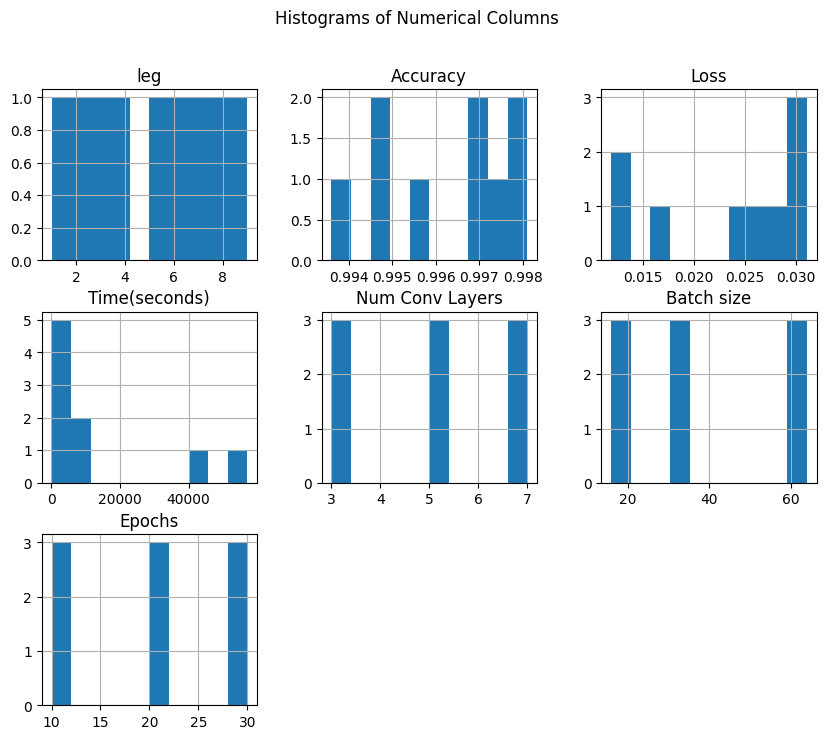

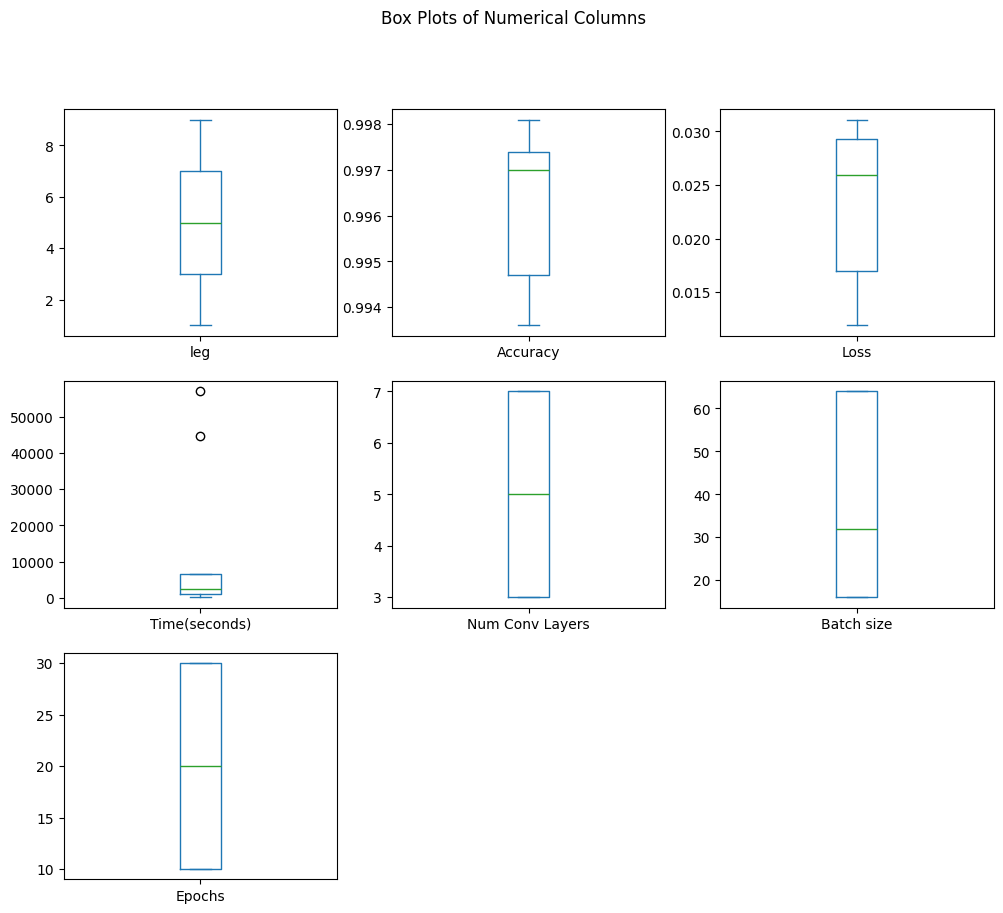

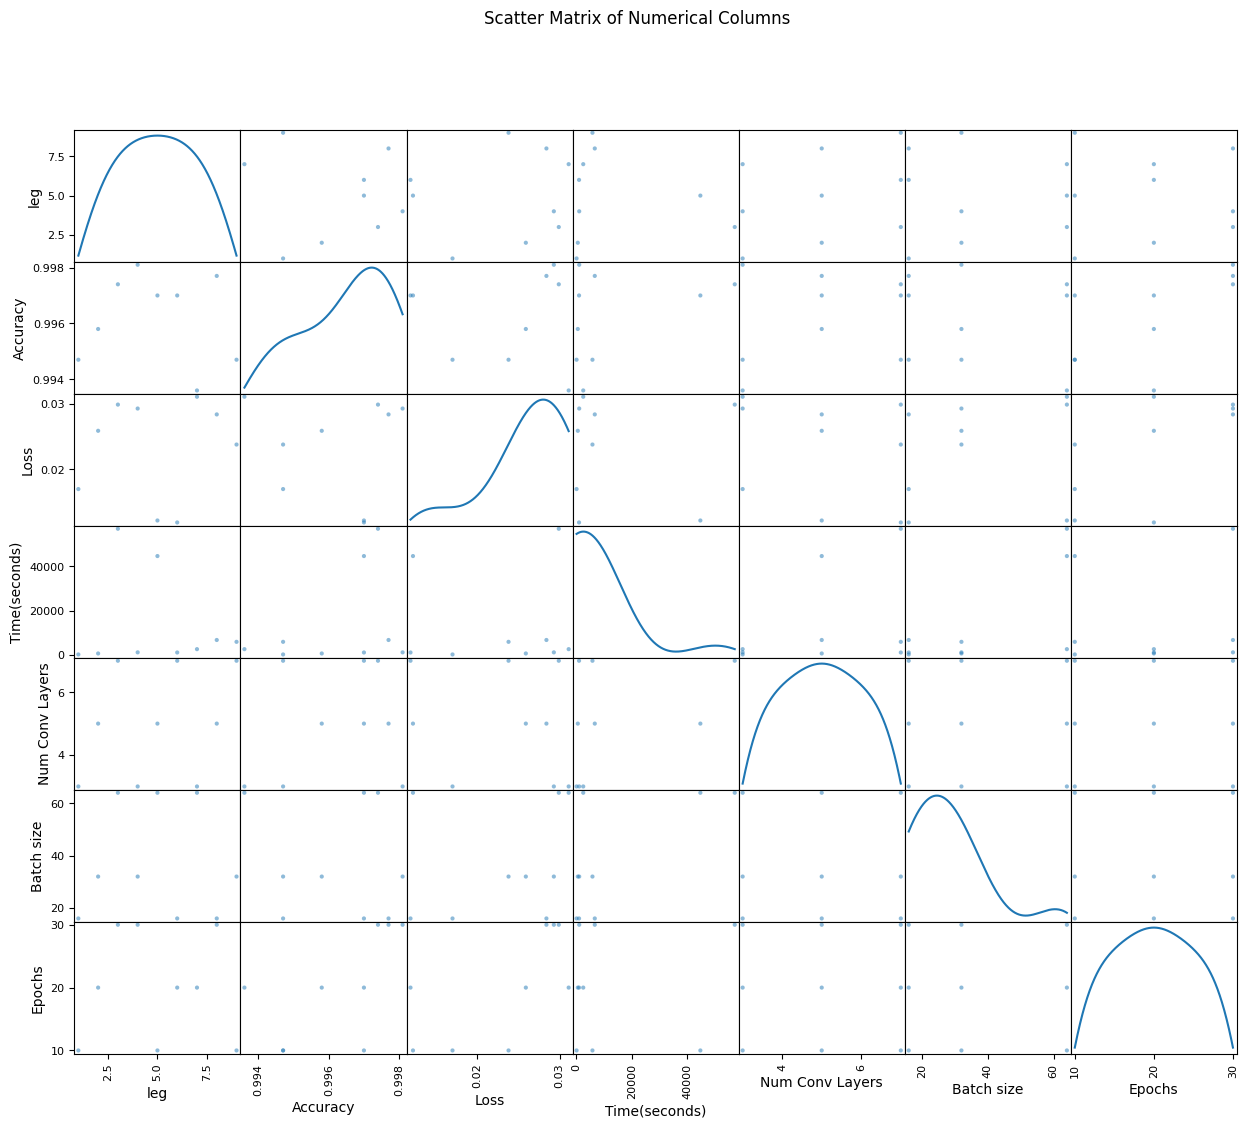

In [21]:
# Data Visualization

# Create histograms for each numerical column
df.hist(figsize=(10, 8))
plt.suptitle('Histograms of Numerical Columns')
plt.show()

# Create box plots for each numerical column
df.plot(kind='box', subplots=True, layout=(3, 3), figsize=(12, 10), title='Box Plots of Numerical Columns')
plt.suptitle('Box Plots of Numerical Columns')
plt.show()

# Create scatter plots for pairs of numerical columns
pd.plotting.scatter_matrix(df, figsize=(15, 12), diagonal='kde')
plt.suptitle('Scatter Matrix of Numerical Columns')
plt.show()